In [1]:
import pandas as pd
import numpy as np

In [2]:
# 지수 표현 제거
pd.options.display.float_format = '{:.5f}'.format

In [3]:
# 데이터 load
arc_df = pd.read_csv('Arc_data.csv')
arc_df.head(10)

,Max,Mean,Std,FFT_Mag1,FFT_Hz1,FFT_Mag2,FFT_Hz2,STFT_Mag1,STFT_Hz1,STFT_Mag2,STFT_Hz2,STFT_diff,label
0,0.25965,0.00527,0.14480,0.02436,1000488.75855,0.01515,1000977.51711,0.04856,0.00000,0.02362,761718.75000,-761718.75000,0
1,0.26263,0.00334,0.14480,0.03535,1000488.75855,0.01261,1334799.60899,0.05855,0.00000,0.02980,3515625.00000,-3515625.00000,0
2,0.25702,0.01063,0.14856,0.02626,1000488.75855,0.01876,1000977.51711,0.06945,0.00000,0.02619,2714843.75000,-2714843.75000,0
3,0.26208,0.00340,0.14493,0.02686,1000488.75855,0.01511,1001466.27566,0.05290,0.00000,0.02466,957031.25000,-957031.25000,0
4,0.26085,0.00035,0.14501,0.02429,1000488.75855,0.01518,1001466.27566,0.05557,0.00000,0.02488,0.00000,0.00000,0
5,0.26219,0.00845,0.14112,0.01860,1000488.75855,0.01557,1412023.46041,0.03502,0.00000,0.02325,2500000.00000,-2500000.00000,0
6,0.26255,0.01018,0.14235,0.02065,1000488.75855,0.01492,1000000.00000,0.04690,0.00000,0.02319,0.00000,0.00000,0
7,0.26176,0.00619,0.14468,0.02827,1000488.75855,0.01480,1000977.51711,0.05583,0.00000,0.02621,449218.75000,-449218.75000,0
8,0.26058,0.00054,0.14156,0.02153,1000488.75855,0.01353,1279081.13392,0.05226,0.00000,0.02388,0.00000,0.00000,0
9,0.26101,0.00508,0.14566,0.02750,1000488.75855,0.01427,1231671.55425,0.05590,0.00000,0.02715,4824218.75000,-4824218.75000,0


In [4]:
# 데이터 내 NA 값 여부 확인
arc_df.isnull().any() # 만약 존재한다면 0으로 대체 혹은, 해당 열을 제외하고 진행

Max          False
Mean         False
Std          False
FFT_Mag1     False
FFT_Hz1      False
FFT_Mag2     False
FFT_Hz2      False
STFT_Mag1    False
STFT_Hz1     False
STFT_Mag2    False
STFT_Hz2     False
STFT_diff    False
label        False
dtype: bool

# 데이터 상관분석

In [5]:
# 독립변수만 따로 추출
features = ['Max', 'Mean', 'Std', 'FFT_Mag1', 'FFT_Hz1', 'FFT_Mag2', 'FFT_Hz2',
            'STFT_Mag1', 'STFT_Hz1', 'STFT_Mag2', 'STFT_Hz2', 'STFT_diff']

arc_corr = arc_df[features]

In [6]:
# 상관계수 출력(method : 'Pearson')
arc_corr.corr()

,Max,Mean,Std,FFT_Mag1,FFT_Hz1,FFT_Mag2,FFT_Hz2,STFT_Mag1,STFT_Hz1,STFT_Mag2,STFT_Hz2,STFT_diff
Max,1.00000,-0.01118,0.99448,0.99831,0.92553,0.72936,0.67675,0.99489,0.99880,0.99636,0.72192,0.58771
Mean,-0.01118,1.00000,-0.02138,-0.01982,-0.03387,-0.04246,-0.04285,-0.01654,-0.01545,-0.01753,0.09467,-0.13137
Std,0.99448,-0.02138,1.00000,0.99862,0.95881,0.79406,0.74604,0.99943,0.99033,0.99944,0.72905,0.56741
FFT_Mag1,0.99831,-0.01982,0.99862,1.00000,0.94274,0.76130,0.71088,0.99872,0.99618,0.99942,0.72767,0.57734
FFT_Hz1,0.92553,-0.03387,0.95881,0.94274,1.00000,0.93380,0.90239,0.95489,0.91070,0.95096,0.70602,0.48067
FFT_Mag2,0.72936,-0.04246,0.79406,0.76130,0.93380,1.00000,0.99259,0.78641,0.70270,0.77797,0.59537,0.31243
FFT_Hz2,0.67675,-0.04285,0.74604,0.71088,0.90239,0.99259,1.00000,0.73689,0.64842,0.72917,0.54870,0.28908
STFT_Mag1,0.99489,-0.01654,0.99943,0.99872,0.95489,0.78641,0.73689,1.00000,0.99136,0.99918,0.73737,0.55927
STFT_Hz1,0.99880,-0.01545,0.99033,0.99618,0.91070,0.70270,0.64842,0.99136,1.00000,0.99330,0.71786,0.59411
STFT_Mag2,0.99636,-0.01753,0.99944,0.99942,0.95096,0.77797,0.72917,0.99918,0.99330,1.00000,0.72841,0.57238


## Feature Select

### VIF
- 제거 순서
1. VIF 계수가 높은 feature제거

2. 단 유사한 feature의 경우, 둘 중 1개만 제거

3. 제거 후 VIF계수 재출력

4. (1, 2, 3)의 과정 반복

In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 피처마다의 VIF 계수를 출력합니다.
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(arc_corr.values, i) for i in range(arc_corr.shape[1])]
vif["features"] = arc_corr.columns
vif

c:\users\user\anaconda3\envs\etri\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,6036.54367,Max
1,4.15443,Mean
2,81379.54608,Std
3,82870.89907,FFT_Mag1
4,31972.35669,FFT_Hz1
5,1576.07964,FFT_Mag2
6,538.74062,FFT_Hz2
7,5536.92182,STFT_Mag1
8,inf,STFT_Hz1
9,7954.05815,STFT_Mag2


In [8]:
# VIF 계수 높은 feature 제거

arc_corr = arc_corr.drop(['Std', 'FFT_Mag2', 'FFT_Hz2', 'STFT_Mag2', 'STFT_Hz2', 'STFT_Hz1'], axis = 1)
vif = pd.DataFrame()
vif['VIF Factor']  = [variance_inflation_factor(arc_corr.values, i) for i in range(arc_corr.shape[1])]
vif['features'] = arc_corr.columns
vif

,VIF Factor,features
0,183.93397,Max
1,3.63172,Mean
2,2356.39208,FFT_Mag1
3,147.13761,FFT_Hz1
4,4166.35611,STFT_Mag1
5,2.25540,STFT_diff


## Feature Extraction

### PCA

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
arc_scale = pd.DataFrame(scaler.fit_transform(arc_corr), columns=arc_corr.columns)

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2) # 주성분 개수: 2
pca.fit(arc_scale)
arc_pca = pca.transform(arc_scale)
print(arc_pca.shape)

(60, 2)


In [11]:
# PCA 주성분분석
pd.Series(np.cumsum(pca.explained_variance_ratio_))

0   0.85744
1   0.93288
dtype: float64

In [12]:
pca_columns=['PC1','PC2']
arc_pca = pd.DataFrame(arc_pca, columns=pca_columns)
arc_pca['label']=arc_df.label
arc_pca

,PC1,PC2,label
0,1.03282,-0.09474,0
1,1.10817,-0.02793,0
2,1.08166,0.33749,0
3,1.03112,-0.18838,0
4,0.99572,-0.42326,0
5,1.11254,0.19672,0
6,1.01178,0.13700,0
7,1.01082,-0.06138,0
8,1.00144,-0.41286,0
9,1.16412,0.15443,0


#  imbalanced Classes

In [13]:
print('Arc Detection data - rows: ',arc_pca.shape[0], 'columns:',arc_pca.shape[1])

Arc Detection data - rows:  60 columns: 3


In [14]:
# target variable 분포 확인
from collections import Counter

Counter(arc_pca.label)

Counter({0: 20, 1: 40})

In [15]:
X = np.array(arc_pca.iloc[:, arc_pca.columns != 'label'])
y = np.array(arc_pca.iloc[:, arc_pca.columns == 'label'])
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (60, 2)
Shape of y: (60, 1)


## SMOTE를 이용한 Oversampling

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

# 기존의 X_train, y_train, X_test, y_test의 형태확인
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (54, 2)
Number transactions y_train dataset:  (54, 1)
Number transactions X_test dataset:  (6, 2)
Number transactions y_test dataset:  (6, 1)


In [17]:
from imblearn.over_sampling import SMOTE
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {}".format(sum(y_train == 0)))

sm = SMOTE(random_state = 42, sampling_strategy = 'auto') # SMOTE 알고리즘, 비율 증가
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) # Over Sampling 진행

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': [36]
Before OverSampling, counts of label '0': [18]
After OverSampling, counts of label '1': 36
After OverSampling, counts of label '0': 36


In [18]:
print("Before OverSampling, the shape of X_train: {}".format(X_train.shape)) # SMOTE 적용 이전 데이터 형태
print("Before OverSampling, the shape of y_train: {}".format(y_train.shape)) # SMOTE 적용 이전 데이터 형태
print("After OverSampling, the shape of X_train: {}".format(X_train_res.shape)) # SMOTE 적용 결과 확인
print("After OverSampling, the shape of y_train: {}".format(y_train_res.shape)) # SMOTE 적용 결과 확인

Before OverSampling, the shape of X_train: (54, 2)
Before OverSampling, the shape of y_train: (54, 1)
After OverSampling, the shape of X_train: (72, 2)
After OverSampling, the shape of y_train: (72,)


# SVM

In [19]:
features = X_train_res
target = y_train_res

In [20]:
from sklearn.svm import SVC
from sklearn import svm, metrics
import numpy as np
import matplotlib.pyplot as plt

svc = SVC(kernel = 'linear', class_weight = 'balanced', C = 1.0, random_state = 0)

In [21]:
model = svc.fit(features, target) # SVM 모델 학습

In [22]:
from sklearn.metrics import confusion_matrix
y_pred = svc.predict(features)
confusion_matrix(target, y_pred)

array([[36,  0],
       [ 0, 36]], dtype=int64)

## kernel SVM 적합 및 비교

- LinearSVC

In [23]:
clf = svm.LinearSVC(C = 1.0, max_iter = 10000)
clf.fit(features, target)
y_pred = clf.predict(features)
confusion_matrix(target, y_pred)

array([[36,  0],
       [ 0, 36]], dtype=int64)

- radial basis function

In [24]:
clf = svm.SVC(kernel = 'rbf', gamma = 0.7, max_iter = 10000)
clf.fit(features, target)
y_pred = clf.predict(features)
confusion_matrix(target, y_pred)

array([[36,  0],
       [ 0, 36]], dtype=int64)

- polynomial kernel

In [25]:
clf = svm.SVC(kernel = 'rbf',degree = 3, C = 0.1,gamma = 'auto')
clf.fit(features, target)
y_pred = clf.predict(features)
confusion_matrix(target, y_pred)

array([[36,  0],
       [ 0, 36]], dtype=int64)

### 시각화

In [26]:
# create Function (시각화 함수 생성)
def make_meshgrid(x, y, h = .02):
    x_min, x_max = x.min()-1, x.max() + 1
    y_min, y_max = y.min()-1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [27]:
# 모델 정의 및 피팅
C = 1.0 # Regularization parameter
models = (svm.SVC(kernel = 'linear', C=C),
         svm.LinearSVC(C=C, max_iter = 10000),
         svm.SVC(kernel = 'rbf', gamma = 0.7, C=C),
         svm.SVC(kernel = 'poly', degree = 3, gamma = 'auto', C=C))
models = (clf.fit(X, y) for clf in models)

In [28]:
titles = ('SVC with linear kernel',
         'LinearSVC (linear kernel)',
         'SVC with RBF kernel',
         'SVC with polynomial (degree 3) kernel')

c:\users\user\anaconda3\envs\etri\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\user\anaconda3\envs\etri\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\user\anaconda3\envs\etri\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\user\anaconda3\envs\etri\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y t

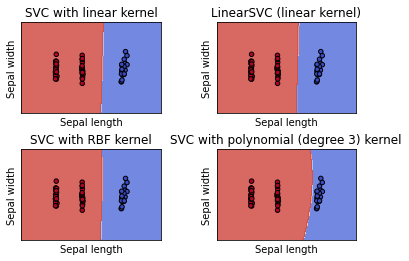

In [29]:
fig, sub = plt.subplots(2,2)
plt.subplots_adjust(wspace = 0.4, hspace = 0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy, cmap = plt.cm.coolwarm, alpha = 0.8)
    ax.scatter(X0, X1, c = y, cmap=plt.cm.coolwarm, s = 20, edgecolors = 'k')
    ax.set_xlim(xx.min(), xx.max())
    #ax_set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_yticks(())
    ax.set_xticks(())
    ax.set_title(title)

plt.show()

## GridSearch

In [32]:
from sklearn import svm, metrics, model_selection
from sklearn.model_selection import GridSearchCV

print("학습 데이터의 수 =", len(target))

# 그리드 서치 매개변수 설정
params = [
    {"C" : [1, 10, 100, 1000], "kernel" : ["linear"]},
    {"C" : [1, 10, 100, 1000], "kernel" : ["rbf"], "gamma":[0.001, 0.0001]}
]

# 그리드 서치 수행
clf = GridSearchCV(svm.SVC(), params, n_jobs = -1)
clf.fit(features, target)
print("학습기 =", clf.best_estimator_)

# 테스트 데이터 확인하기
pre = clf.predict(X_test)
ac_score = metrics.accuracy_score(pre, y_test)
print("정답률 =", ac_score)

학습 데이터의 수 = 72
학습기 = SVC(C=1, kernel='linear')
정답률 = 1.0


In [30]:
# 모델 성능

svc = SVC(kernel = 'linear', class_weight = 'balanced', C = 1.0, random_state = 0)
model = svc.fit(features, target)

pre = clf.predict(X_test)

ac_score = metrics.accuracy_score(y_test, pre)
cl_report = metrics.classification_report(y_test, pre)
print("정답률 = ",ac_score)
print("리포트 =\n", cl_report)

정답률 =  1.0
리포트 =
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         4

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



In [31]:
# Class 예측

new_observation = [[1, -0.2]]
svc.predict(new_observation)

array([0], dtype=int64)